# 🛒 Project Title: 🖤 CUSTOMER PURCHASE BEHAVIOR ANALYSIS IN RETAIL 🖤
   **🧠🖤 DATA • INSIGHTS • STRATEGY • GROWTH 🖤🧠**

This notebook provides an end-to-end pipeline to analyze retail transaction data and extract actionable insights. 

We will:

- Load & Clean Data
- Store & Retrieve from MySQL
- Exploratory Data Analysis (EDA)
- Key Performance Indicators (KPIs)
- RFM Segmentation & Clustering
- Market Basket Analysis (Apriori Algorithm)
- Business Interpretation

---

**Why This Matters:**  

- **Data-Driven Decisions:** Understand what drives revenue and customer loyalty.  
- **Personalization:** Tailor offers to different customer segments.  
- **Operational Efficiency:** Optimize inventory and marketing spend.  
- **Competitive Advantage:** Leverage pattern mining for cross‑sell and upsell opportunities.

---

It also explains each Python script used in the project.

Let's begin.

## 📘 Objective

To analyze customer purchase data from a retail or e-commerce store to:

- Identify purchasing patterns and trends  
- Segment customers based on buying behavior  
- Recommend strategies for targeted marketing and inventory optimization  


## 📊 Dataset

* **Source**: [Kaggle - Online Retail Dataset](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)
* **Features**:
  - `InvoiceNo`, `StockCode`, `Description`  
  - `Quantity`, `InvoiceDate`, `UnitPrice`  
  - `CustomerID`, `Country`  


## 🧰 Tools and Technologies

- **Programming Language**: Python  
- **Libraries**: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Plotly, mlxtend
- **Database**: MYSQL
- **Optional**: Power BI or Tableau for dashboards  


## 🔍 Methodology

1. Data Cleaning  
2. Exploratory Data Analysis (EDA)  
3. RFM-based Customer Segmentation  
4. Market Basket Analysis (Apriori Algorithm)  
5. Visualizations & Business Insights  


## 🔧 Step 1: Import Dependencies

We first import core libraries for data handling, visualization, logging, and manage Python’s import path so we can load our custom scripts.

### Script Summary:
- `_init_.py` → Leave empty or use to initialize logging if needed
- `utils.py` → Generate_transaction_hash
- `data_cleaning.py` → Cleans raw dataset.(duplicates, nulls, formatting)
- `mysql_pipeline.py` → Writes/reads cleaned data to/from MySQL.
- `eda_analysis.py` → Generates and saves EDA charts.
- `rfm_segmentation.py` → Calculates RFM and segments customers.
- `market_basket.py` → Finds product bundles using Apriori and builds association rules.

Configure logging to capture INFO/ERROR messages into `logs/process_log.log`.

Define our **MySQL connection** details in `MYSQL_CONFIG`:
- These credentials will be used by our MySQL pipeline to store and retrieve the cleaned data.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from datetime import datetime

import sys
import os

# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Confirm path added
print("🛠️ PYTHONPATH:", project_root)

# import custom script
from scripts.data_cleaning import load_and_clean_data
from scripts.mysql_pipeline import store_to_mysql, read_clean_data
from scripts.eda_analysis import run_eda
from scripts.rfm_segmentation import perform_rfm_clustering
from scripts.market_basket import perform_market_basket_analysis

#logging setup
logging.basicConfig(
    filename = '../logs/process_log.log',        # where to save logs
    level = logging.INFO,                        # log level (INFO, ERROR, DEBUG)
    format = '%(asctime)s - %(levelname)s - %(message)s'    
)

%matplotlib inline

from dotenv import load_dotenv

# Load from .env file
load_dotenv()

# MySQL credentials 
MYSQL_CONFIG = {
    'host': os.getenv("DB_HOST"),
    'user': os.getenv("DB_USER"),
    'password': os.getenv("DB_PASSWORD"),
    'database': os.getenv("DB_NAME")
}

🛠️ PYTHONPATH: C:\Users\ayesh\Projects\Customer_Purchase_Behaviour_Analysis_in_Retail


## 📥 Step 2: Load and Clean the Dataset

We use `scripts/data_cleaning.py`:

**Load and clean** the raw CSV using our `load_and_clean_data()` function:

### What it does:
- Loads CSV with proper encoding
- Drops duplicates and rows without `CustomerID`
- Filters out canceled orders (`InvoiceNo` starts with 'C')
- Removes rows with Quantity or UnitPrice <= 0
- Calculates a `TotalPrice` column
- Converts `InvoiceDate` to datetime format

**Save the cleaned DataFrame** to a CSV (`../outputs/data/clean_online_retail.csv`) for reproducibility.

### Perform basic data checks:
   - Print the DataFrame shape  
   - List column names  
   - Count nulls per column  
   - Show data types

**Preview the first few rows** with `df.head()`

We wrap the process in a `try` block so that any database or I/O errors are caught, printed, and re‑raised.


In [2]:
#Load and Clean data with checks
try:
    #Data loaded and cleaned
    csv_path = r"C:\Users\ayesh\Projects\Customer_Purchase_Behaviour_Analysis_in_Retail\data\online_retail.csv"
    df= load_and_clean_data(csv_path)
    logging .info('Data loaded and cleaned.')
    print('Data loaded and cleaned.')

    # Save cleaned data
    df.to_csv(r"../outputs/data/clean_online_retail.csv", index=False)
    logging.info(f" Cleaned data saved to: ../outputs/data/clean_online_retail.csv ")
    print(f" Cleaned data saved to: ../outputs/data/clean_online_retail.csv")

except Exception as e:
    logging.error(f" Failed to save cleaned data: {e}")
    print(f" Failed to save cleaned data: {e}")
    raise

#Data checks
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())
print('Null values:', df.isnull().sum())
print('Data types:', df.dtypes)

df.head()

Data loaded and cleaned.
 Cleaned data saved to: ../outputs/data/clean_online_retail.csv
Shape: (779425, 10)
Columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'TotalPrice', 'Transaction_hash']
Null values: Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID         0
Country             0
TotalPrice          0
Transaction_hash    0
dtype: int64
Data types: Invoice                     object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
Price                      float64
Customer ID                  int32
Country                     object
TotalPrice                 float64
Transaction_hash            object
dtype: object


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Transaction_hash
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,3bf6eb37c723a7fc24ffd2de4e6a1e843d83e5ed735675...
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,38e9f1e628ae4ed965561f0f9954d057a146402ee9a74d...
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,1d401df01a44c657f53089679ceca422356af22c26856d...
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,61ed8bd3a3b2280af08ee18a4286d8fd37f7529aaf3ca6...
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,0d6133e78e879555d9990f0601759d541446e720edf75e...


## 💾 Step 3: Save Cleaned Data to MySQL & Verify

This cell performs three key tasks:
We now use `scripts/mysql_pipeline.py:`

### Store cleaned DataFrame in MySQL:  
We call `store_to_mysql(df, MYSQL_CONFIG, mode='append', backup=True)`, which:
 - Connects to MySQL using mysql-connector-python
 - Creates the database and table if they don't exist
 - Inserts new records (avoiding duplicates via transaction hash)
 - Commits cleaned transactions into your MySQL database
 - Optionally creates or refreshes a backup table

🔐 Ensure your DB credentials and database (retail_db) are set up correctly.

### Verify the total row count in the cleaned_sales_data table:
 - Establish a new MySQL connection
 - Execute SELECT COUNT(*)
 - Print the resulting row_count

We wrap the process in a `try` block so that any database or I/O errors are caught, printed, and re‑raised.

In [3]:
#Save data to MYSQL & confirm
import mysql.connector

try:
    #Data saved to mysql
    store_to_mysql(df, MYSQL_CONFIG, mode= 'append',backup= True)
    print('Data saved to mysql.')

    #Verify insert count
    conn = mysql.connector.connect(**MYSQL_CONFIG)
    cursor = conn.cursor()
    
    cursor.execute('SELECT COUNT(*) FROM cleaned_sales_data')
    row_count = cursor.fetchone()[0]
    cursor.close()
    conn.close()
    print(f"Rows in cleaned_sales_data: {row_count}")
    
except Exception as e:
    logging.error(f"MYSQL insert failed: {e}")
    raise

 Backup table 'cleaned_sales_data_backup' updated.
Data saved to mysql.
Rows in cleaned_sales_data: 779390


## 📤 step 4: Reload Cleaned Data from MySQL

From this point forward, we drive all analyses from the trusted, cleaned dataset in the database:

1. **Read** the `cleaned_sales_data` table into a DataFrame via `read_clean_data(MYSQL_CONFIG)`.
2. **Print confirmation** that the data loaded successfully.
3. **Display key metadata**:
   - **Shape**: number of rows and columns  
   - **Columns**: list of field names  
   - **Head**: preview of the first few records  
4. **Log** the row count to ensure reproducibility and for auditing.

We wrap the process in a `try` block so that any database or I/O errors are caught, printed, and re‑raised.

In [4]:
# From now on, Load the cleaned data from MySQL for analysis
try:
    df = read_clean_data(MYSQL_CONFIG)
    print("Cleaned data loaded back from MySQL.")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    logging.info(f"Read {len(df)} cleaned rows from MySQL")
    print("Top rows:", df.head())
    
except Exception as e:
    print(" Failed to load data from MySQL", e)
    raise

C:\Users\ayesh\Projects\Customer_Purchase_Behaviour_Analysis_in_Retail\scripts\mysql_pipeline.py:134: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


Cleaned data loaded back from MySQL.
Shape: (779390, 10)
Columns: ['Transaction_hash', 'Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country', 'TotalPrice']
Top rows:                                     Transaction_hash Invoice StockCode  \
0  00000168b5f5b2ccb7a890b854ac7bd20e67655bae86c7...  523002     47580   
1  0000153de03b9398cf57c5e630b06b9d5f7f8cdc21a53a...  497901     22380   
2  0000210f8075de566b8d86a63c06e878ce6c9f10053dd4...  560974     22960   
3  000044534658aac1d912690bf3143dcc2da8f25675de6f...  567865     22947   
4  00007089ff1d34d7e9d1ce0ccf513e031893241d245e48...  498045     22413   

                       Description  Quantity         InvoiceDate  Price  \
0            TEA TIME DES TEA COSY         2 2010-09-19 16:02:00   2.55   
1              TOY TIDY SPACEBOY          10 2010-02-14 12:52:00   2.10   
2         JAM MAKING SET WITH JARS         6 2011-07-22 11:55:00   4.25   
3       WOODEN ADVENT CALENDAR RED         3

## 📊 Step 5: Exploratory Data Analysis (EDA)

We now run EDA on `df` (the MySQL‑sourced clean data).
We visualize customer purchasing behavior and sales patterns using EDA:

**Script Reference:** `scripts/eda_analysis.py`

---

### 🔍 Objective

Gain a comprehensive understanding of sales patterns and customer behavior by visualizing key metrics:

- **Top Products:** Which items sell the most by quantity  
- **Revenue Trends:** How revenue fluctuates over time (monthly, daily)  
- **Purchase Timing:** Peak hours when customers make the most purchases  
- **Geographic Insights:** Which countries contribute the most revenue  

---

### 🧰 Methodology

1. **Top-Selling Products**  
   - Aggregate `Quantity` by `Description`  
   - Plot the **top 10** products in a horizontal bar chart  

2. **Monthly Revenue Trend**  
   - Extract `Month` from `InvoiceDate`  
   - Sum `TotalPrice` per month  
   - Annotate with **highest**, **lowest**, and **average** revenue  

3. **Daily Revenue Trend**  
   - Group by date (`InvoiceDate.date()`)  
   - Plot daily revenue with a **7-day rolling average**  
   - Highlight spikes and dips  

4. **Purchase Time Analysis**  
   - Extract `Hour` from `InvoiceDate`  
   - Sum `TotalPrice` per hour  
   - Identify **peak purchasing hours** for optimal engagement  

5. **Revenue by Country**  
   - Sum `TotalPrice` by `Country`  
   - Display **top 10** countries in a bar chart  

---

### 📈 Outputs

- **Figures saved to:**  
  `../outputs/figures/eda_fig/`  
  - `top_products.png`  
  - `Monthly Revenue Trend.png`  
  - `Daily Revenue Trend.png`  
  - `revenue_by_hour.png`  
  - `revenue_by_country.png`  

---

### 💡 Business Insights

- **Best-Sellers:** Focus promotions on top 10 products to maximize ROI.  
- **Seasonality:** Plan inventory and marketing around monthly peaks (e.g., holidays).  
- **Peak Hours:** Schedule flash sales and ad campaigns between identified peak hours.  
- **Geographic Focus:** Allocate resources to high‑revenue countries and explore expansion in underperforming regions.  

---

These visual insights frame our understanding of customer behavior before we move into segmentation.



Top 10 Selling Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                74224
BROCADE RING PURSE                     70082
PACK OF 60 PINK PAISLEY CAKE CASES     54592
60 TEATIME FAIRY CAKE CASES            52828
PACK OF 72 RETRO SPOT CAKE CASES       45129
Name: Quantity, dtype: int64


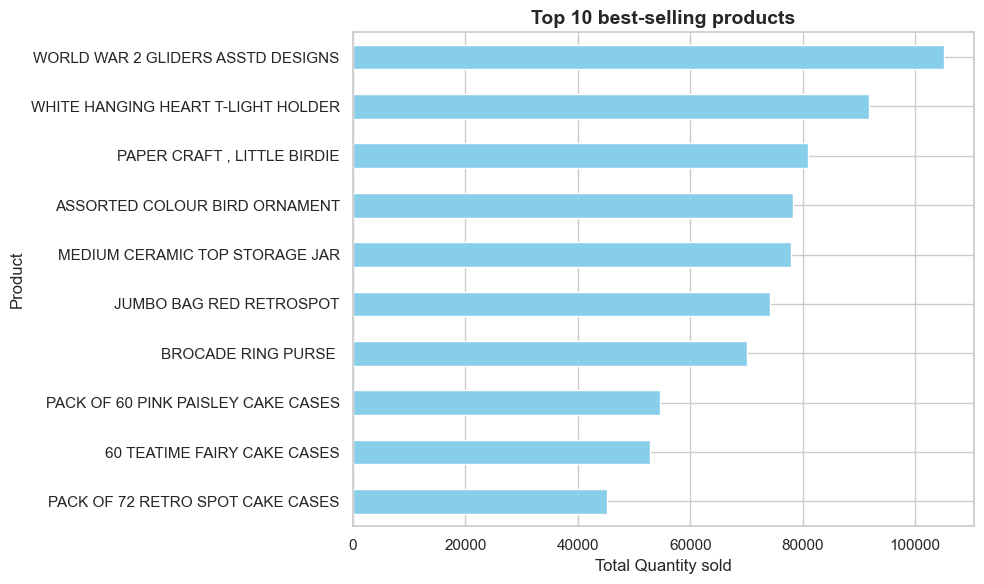


Monthly Revenue:
Month
2009-12     683465.400
2010-01     555802.672
2010-02     504555.976
2010-03     696959.821
2010-04     591982.002
2010-05     597832.380
2010-06     636371.130
2010-07     589736.170
2010-08     602224.600
2010-09     828963.551
2010-10    1033094.060
2010-11    1166457.732
2010-12     570158.050
2011-01     568101.310
2011-02     446084.920
2011-03     593617.960
2011-04     464499.161
2011-05     677340.300
2011-06     660046.050
2011-07     598962.051
2011-08     644051.040
2011-09     950678.021
2011-10    1033368.990
2011-11    1154695.210
2011-12     517208.840
Freq: M, Name: TotalPrice, dtype: float64


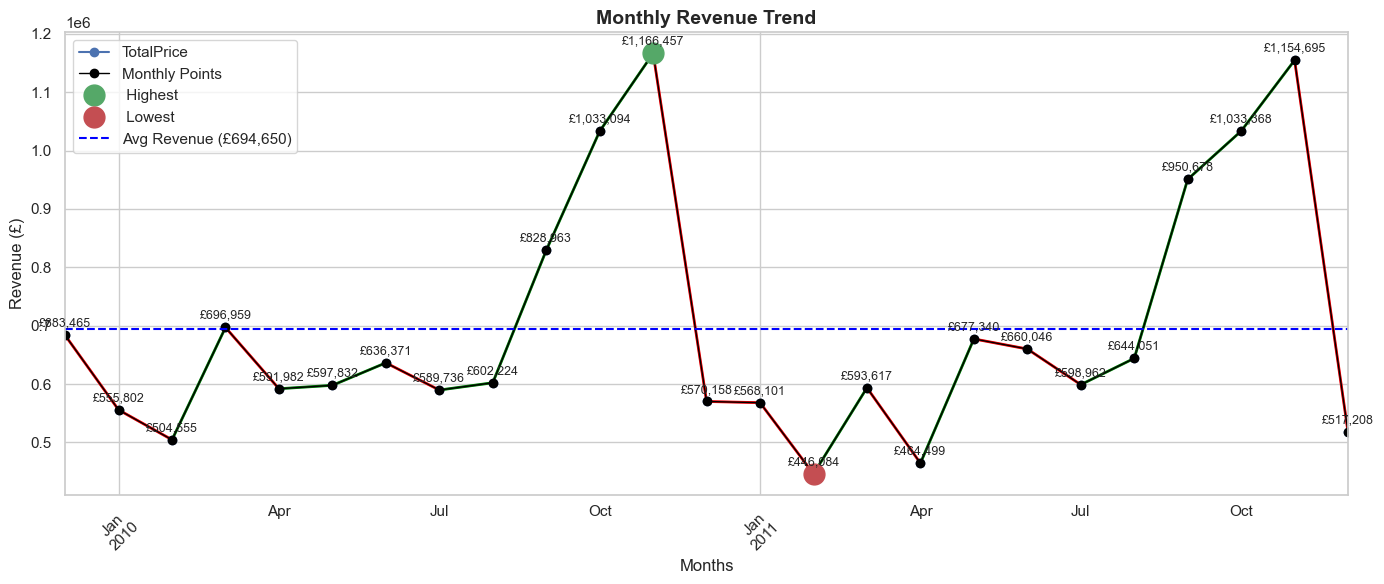


Daily Revenue:
Daily
2009-12-01     43894.87
2009-12-02     52762.06
2009-12-03     67413.62
2009-12-04     33913.60
2009-12-05      9803.05
                ...    
2011-12-05     58081.09
2011-12-06     45989.66
2011-12-07     69230.60
2011-12-08     50395.96
2011-12-09    184348.06
Name: TotalPrice, Length: 604, dtype: float64


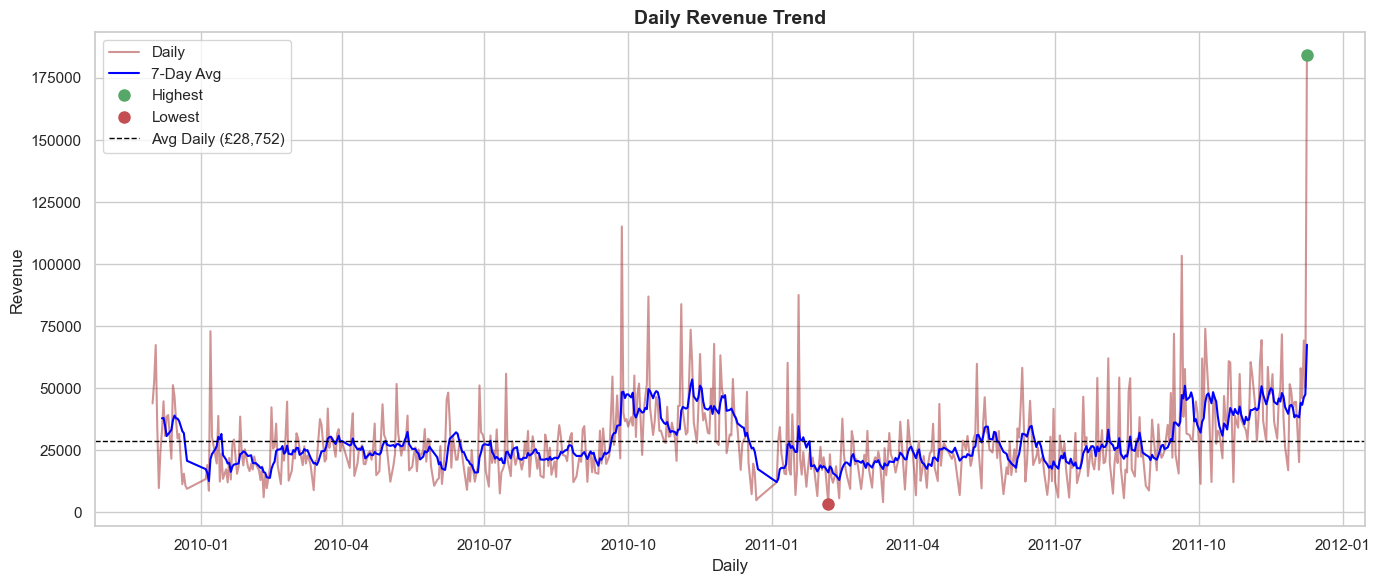


Hourly sales:
Hour
6           4.250
7       75745.570
8      524612.550
9     1484450.941
10    2320473.843
11    2233730.103
12    2690518.951
13    2341684.964
14    1962008.531
15    1839070.712
16    1055122.471
17     484463.451
18     190860.290
19     124825.770
20      38685.000
Name: TotalPrice, dtype: float64


C:\Users\ayesh\Projects\Customer_Purchase_Behaviour_Analysis_in_Retail\scripts\eda_analysis.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette="viridis")


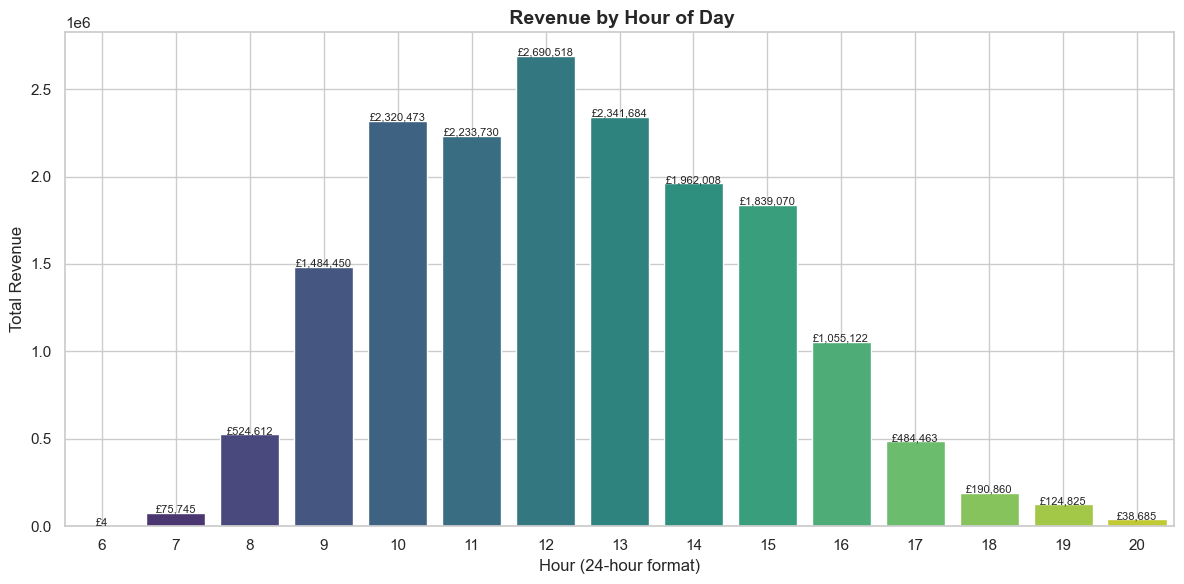


Top 10 Countries by Revenue:
Country
United Kingdom    1.438812e+07
EIRE              6.165705e+05
Netherlands       5.540381e+05
Germany           4.240463e+05
France            3.487690e+05
Australia         1.692835e+05
Spain             1.083325e+05
Switzerland       1.000619e+05
Sweden            9.151582e+04
Denmark           6.858069e+04
Name: TotalPrice, dtype: float64


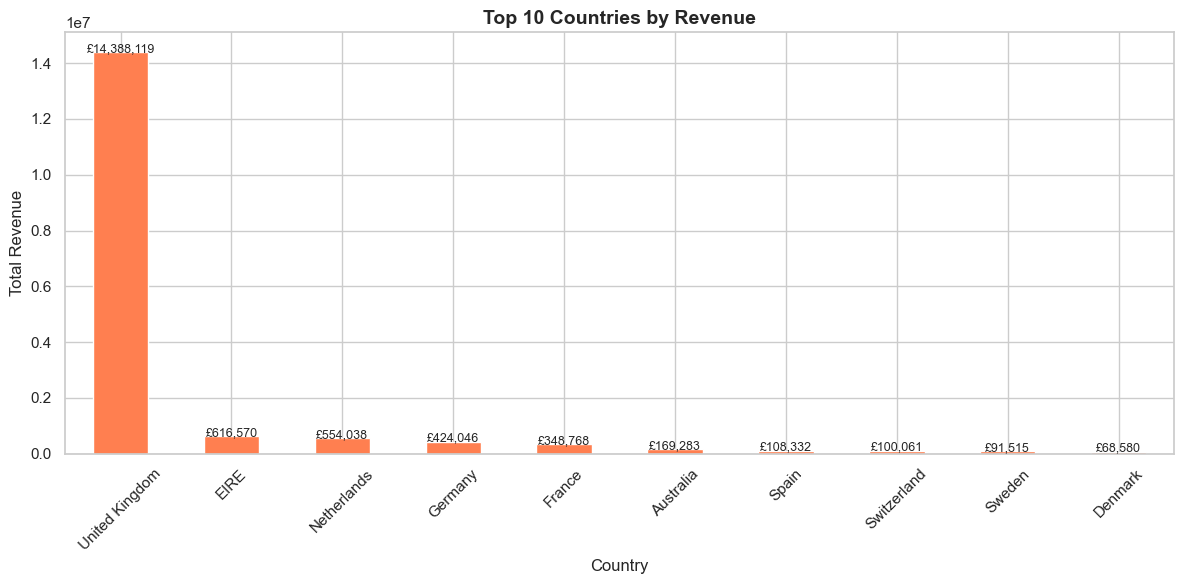

EDA complete; figures saved to outputs/figures/eda_fig


In [5]:
# EDA Findings
try:
    run_eda(df)
    print("EDA complete; figures saved to outputs/figures/eda_fig")

except Exception as e:
    print("EDA failed", e)
    raise

## 📊 step 6: Key Performance Indicators (KPIs)

Now that we’ve visualized sales trends, let’s compute the core business metrics:

- **Total Unique Customers**: How many distinct buyers  
- **Total Transactions**: How many invoices processed  
- **Total Products Sold**: How many distinct product SKUs moved  
- **Total Quantity Sold**: Total units across all transactions  
- **Total Revenue**: Sum of all sales (TotalPrice)  
- **Average Order Value (AOV)**: Revenue per invoice (Revenue ÷ Transactions)

These KPIs give us a snapshot of scale, customer reach, and average purchase behavior before we segment and cross‑sell.


In [6]:
# KPI Dashboard (Basic KPIs)
print("\n Key Performance Indicators:")
print("Total Unique Customers:", df['CustomerID'].nunique())
print("Total Transactions:", df['Invoice'].nunique())
print("Total Products Sold:", df['Description'].nunique())
print("Total Quantity Sold:", df['Quantity'].sum())
print("Total Revenue:", df['TotalPrice'].sum().round(2))
print("Average Order Value:", df.groupby('Invoice')['TotalPrice'].sum().mean().round(2))



 Key Performance Indicators:
Total Unique Customers: 5878
Total Transactions: 36969
Total Products Sold: 5283
Total Quantity Sold: 10513426
Total Revenue: 17366257.4
Average Order Value: 469.75


## 🎯 step 7: RFM Segmentation & Clustering

We now segment customers using Recency, Frequency, Monetary (RFM) metrics via our `scripts/rfm_segmentation.py` module.

---

### 🔍 Objective

Segment customers into meaningful groups based on three key metrics:

- **Recency (R):** Days since the customer’s last purchase  
- **Frequency (F):** Total number of purchase transactions  
- **Monetary (M):** Total revenue contributed  

This enables targeted marketing, personalized offers, and improved retention strategies.

---

### 🧰 Methodology

1. **Snapshot Date**  
   - Use the day after the most recent transaction as a reference point for Recency.

2. **Compute RFM Metrics**  
   - **Recency:** `(snapshot_date - last_purchase_date).days`  
   - **Frequency:** Count of unique invoices per customer  
   - **Monetary:** Sum of `TotalPrice` per customer  

3. **Outlier Handling**  
   - Remove extreme values using the **Interquartile Range (IQR)** method to avoid skewed clustering.

4. **Feature Scaling**  
   - Standardize R, F, M so distance-based clustering treats each equally.

5. **Determine Optimal Clusters**  
   - Use **Elbow (Inertia)** and **Silhouette** scores for k = 2–9 to select the best `k` (here, `k = 4`).

6. **K‑Means Clustering**  
   - Assign each customer to one of 4 clusters.

7. **Average Order Value (AOV)**  
   - Compute AOV = Monetary ÷ Frequency for further segmentation insight.

8. **Segment Labeling**  
   - Map clusters to human-friendly labels, e.g.,  
     - **Loyal Customers** (low R, high F, high M)  
     - **At‑Risk Customers** (high R, low F, low M)  
     - **Frequent Low‑Spenders**  
     - **Recent Big Spenders**  

---

### 📊 Outputs

- **CSV:** `../outputs/data/rfm_segments.csv`  
- **Figures:**  
  - `rfm_Elbow_Silhouette_analysis.png` (Elbow & Silhouette plot)  
  - `rfm_cluster_summary.png` (Heatmap of cluster centroids)  
  - `rfm_cluster_views.png` (3‑panel scatter: R vs M, F vs M, R vs F)

---

### 💡 Business Impact

- **Identify VIPs:** Reward “Loyal Customers” to boost retention.  
- **Win‑Back Campaigns:** Re-engage “At‑Risk Customers” with special offers.  
- **Upsell Opportunities:** Target “Recent Big Spenders” with premium products.  
- **Retention Programs:** Encourage “Frequent Low‑Spenders” to increase basket size.  

---

This clustering informs targeted marketing and resource allocation.

RFM calculated successfully

 RFM Table (raw):
            Recency  Frequency  Monetary
CustomerID                              
12346           326         12  77556.46
12347             2          8   4921.53
12348            75          5   2019.40
12349            19          4   4428.69
12350           310          1    334.40

 Silhouette Score for k = 2: 0.455

 Silhouette Score for k = 3: 0.439

 Silhouette Score for k = 4: 0.408

 Silhouette Score for k = 5: 0.379

 Silhouette Score for k = 6: 0.355

 Silhouette Score for k = 7: 0.337

 Silhouette Score for k = 8: 0.363

 Silhouette Score for k = 9: 0.346


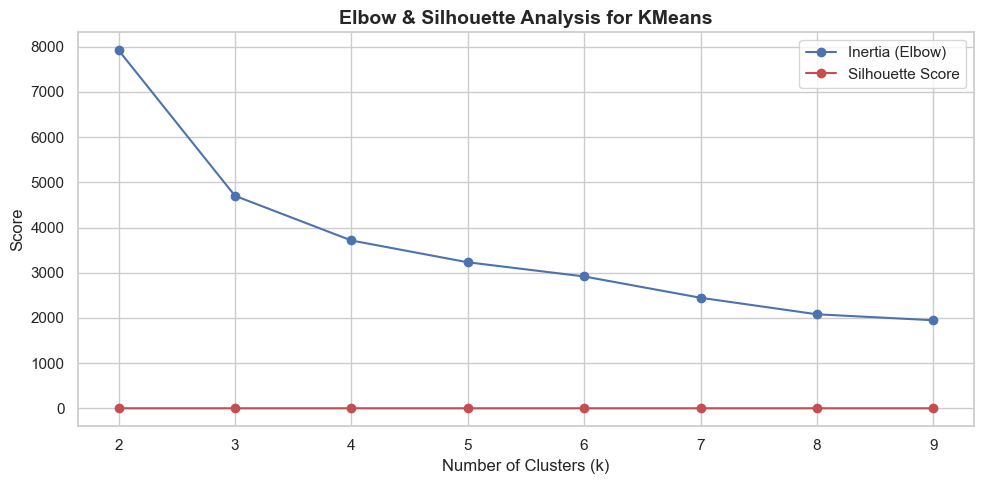


 RFM Table with Clusters:
            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12348            75          5   2019.40        0
12350           310          1    334.40        1
12351           375          1    300.93        1
12352            36         10   2386.04        3
12353           204          2    406.76        2


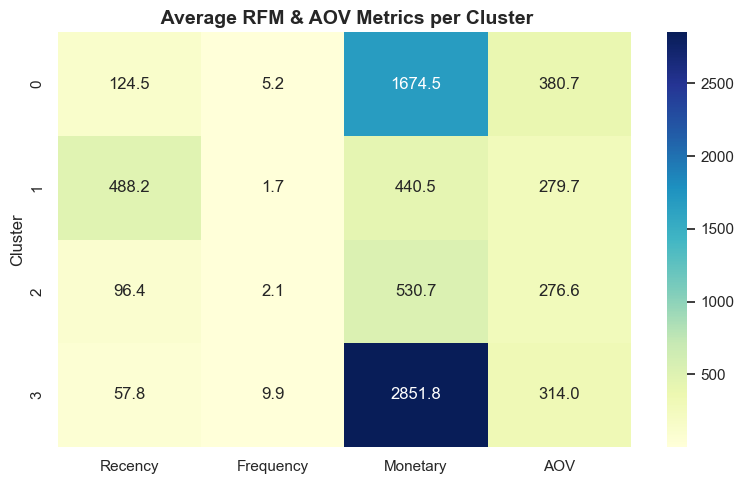

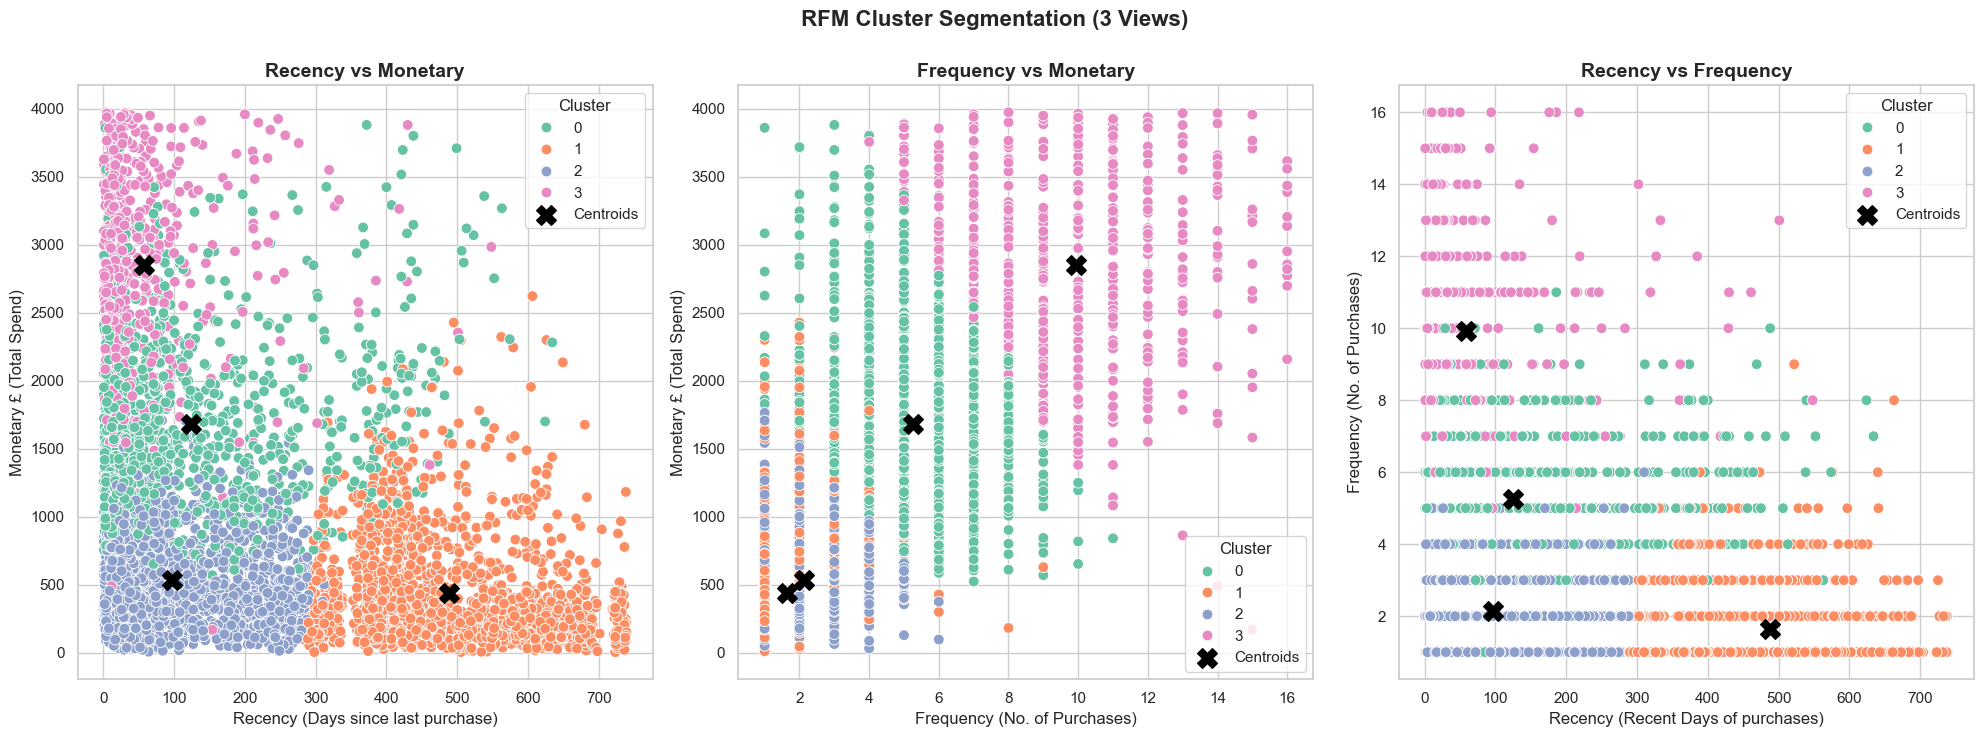


 RFM Clustering Complete. Segmented file saved to : ../outputs/data/rfm_segments.csv


,Recency,Frequency,Monetary,Cluster,AOV,Segment
CustomerID,,,,,,
12348,75,5,2019.40,0,403.88,Loyal Customers
12350,310,1,334.40,1,334.40,Inactive/At-Risk Customers
12351,375,1,300.93,1,300.93,Inactive/At-Risk Customers
12352,36,10,2386.04,3,238.60,Recent Big Spenders
12353,204,2,406.76,2,203.38,Frequent Low-Spenders


In [7]:
# Perform Recency, Frequency and Monrtary (RFM) Segmentation/Clustering
try:
    rfm = perform_rfm_clustering(df)
    
    # Save clustered table results 
    rfm.to_csv(r'../outputs/data/rfm_segments.csv')
    print("\n RFM Clustering Complete. Segmented file saved to : ../outputs/data/rfm_segments.csv")

    #Preview segmented data
    display(rfm.head())
    
except Exception as e:
    print(" RFM Segmentation Failed:", e)
    raise


## 🧺 step 8: Market Basket Analysis (Apriori Algorithm)

**Script Reference:** `scripts/market_basket.py`

---

### 🔍 Objective

Use the Apriori algorithm to discover products that are frequently purchased together. These insights drive:

- **Product Bundling**: Create attractive bundles of complementary items  
- **Cross‑Sell Recommendations**: Suggest add‑on items at checkout  
- **Targeted Promotions**: Design offers based on strong associations  
- **Inventory Optimization**: Stock commonly paired products together  

---

### 🧰 Methodology

1. **Data Encoding**  
   - Transform transactions into a **basket matrix** (Invoices × Products)  
   - Binary encode: 1 if purchased, 0 otherwise  

2. **Apriori Algorithm**  
   - Extract **frequent itemsets** above a minimum support threshold  

3. **Association Rule Mining**  
   - Generate rules “If A, then B”  
   - Filter by:
     - **Support**: % of transactions containing both A and B  
     - **Confidence**: P(B | A)  
     - **Lift**: How much P(B | A) exceeds baseline P(B)  

4. **Visualization**  
   - 📈 **Scatter Plot** (Support vs. Confidence, bubble size = Lift, labeled by rule number)  
   - 📊 **Bar Plot** (Top rules ranked by Lift, annotated with strength categories)  

---

### 📌 Interpretation Guide

| Metric        | Definition                                                        | Business Insight                           |
|---------------|-------------------------------------------------------------------|---------------------------------------------|
| **Support**   | Fraction of all transactions containing the itemset               | Popularity of the combination               |
| **Confidence**| Likelihood that B is bought when A is bought                      | Strength of the implication                 |
| **Lift**      | Ratio of confidence to baseline probability of B (P(B | A)/P(B))  | Association strength (>1 positive, <1 negative) |

> **Example:**  
> A rule with **Lift = 12.4** means customers who buy A are **12.4× more likely** to buy B than random chance.

---

### 🗄️ Outputs

- **Rules CSV**: `../outputs/data/final_association_rules.csv`  
- **Figures**:  
  - `../outputs/figures/mba_fig/top_association_rules.png`  
  - `../outputs/figures/mba_fig/top_rules_by_lift.png`  

---

### 💡 Business Impact

- **Boost AOV** by bundling frequently associated items  
- **Increase Conversion** with targeted cross‑sell prompts  
- **Optimize Stock** by aligning inventory with purchasing patterns  

Enter Country for MBA (press Enter to use all countries):  


 Starting Market Basket Analysis...
 No country specified — using full dataset.
Creating basket matrix (Invoice x Products)...
Converting quantities to binary (1=Purchased, 0=Not Purchased)...
basket_encoded: Description    DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
Invoice                                                                       
489434                                         0                          0   
489435                                         0                          0   
489436                                         0                          0   
489437                                         0                          0   
489438                                         0                          0   
...                                          ...                        ...   
581583                                         0                          0   
581584                                         0                          0   
5

C:\Users\ayesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets Found: 173 with support >= 0.02
      support                                           itemsets
0    0.036815                           (6 RIBBONS RUSTIC CHARM)
1    0.021667                  (60 CAKE CASES VINTAGE CHRISTMAS)
2    0.047743                      (60 TEATIME FAIRY CAKE CASES)
3    0.031810                   (72 SWEETHEART FAIRY CAKE CASES)
4    0.028159                       (ALARM CLOCK BAKELIKE GREEN)
..        ...                                                ...
168  0.020044     (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL.)
169  0.020936  (LUNCH BAG SPACEBOY DESIGN , LUNCH BAG  BLACK ...
170  0.031188  (WHITE HANGING HEART T-LIGHT HOLDER, RED HANGI...
171  0.022100  (STRAWBERRY CERAMIC TRINKET BOX, SWEETHEART CE...
172  0.026860  (WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...

[173 rows x 2 columns]
🔗 Generating Association Rules...
Rules Generated: 15 (Confidence ≥ 0.3, Lift ≥ 1.0)
                            antecedents                      

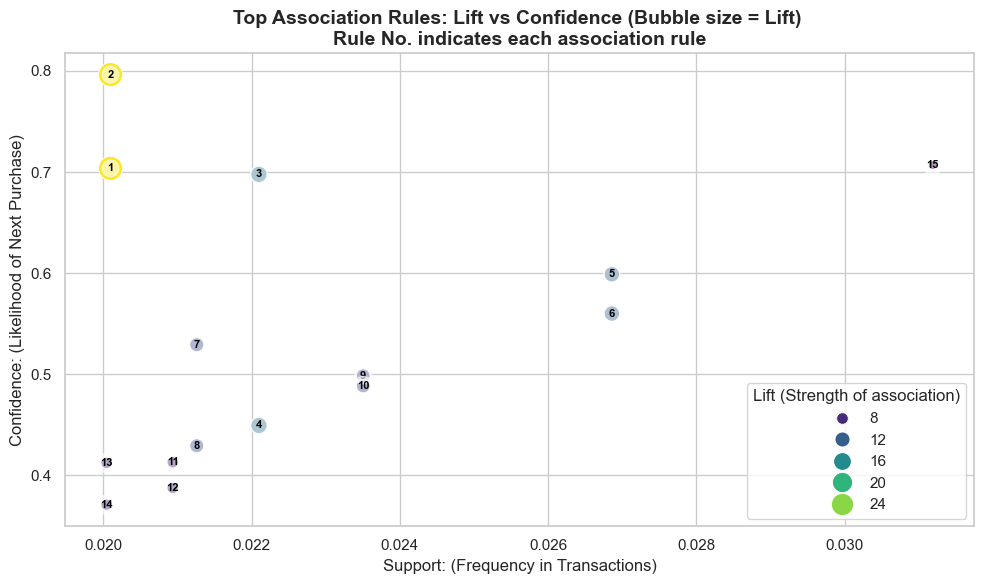

 Plotting: Bar Plot (Top Rules by Lift)...


C:\Users\ayesh\Projects\Customer_Purchase_Behaviour_Analysis_in_Retail\scripts\market_basket.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rules_df, y='lift', x='Rule No.', palette='coolwarm')


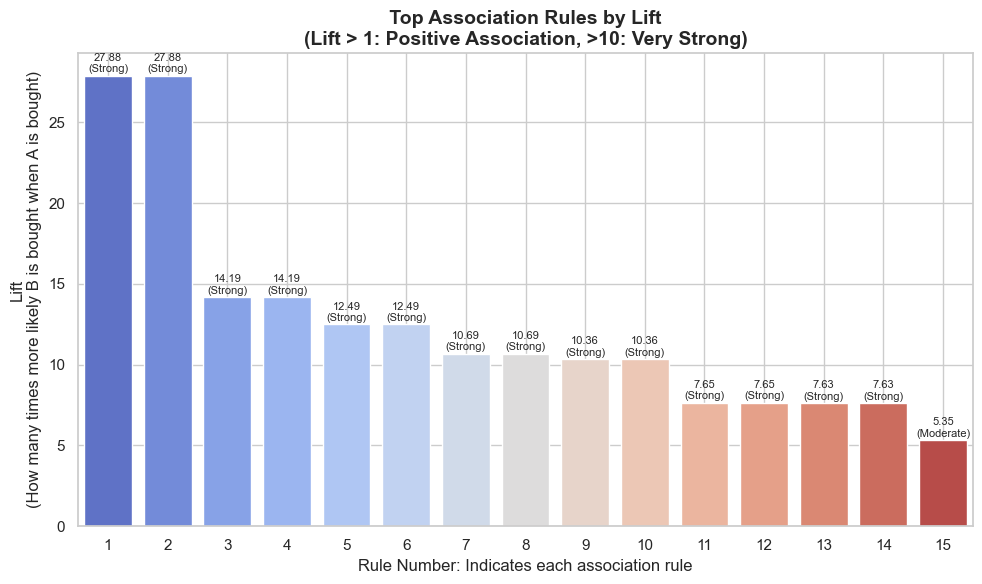


 Market Basket Analysis completed and plotted.


,Rule No.,antecedents,consequents,support,confidence,lift
0,1,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.020098,0.703598,27.879242
1,2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.020098,0.796356,27.879242
2,3,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.022100,0.697694,14.187602
3,4,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.022100,0.449395,14.187602
4,5,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.026860,0.598914,12.488023
5,6,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.026860,0.560068,12.488023
6,7,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.021261,0.529293,10.686745
7,8,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.021261,0.429274,10.686745
8,9,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.023506,0.498566,10.360582
9,10,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.023506,0.488477,10.360582


 Market Basket Analysis complete


In [8]:
# Market Basket Analysis
try:
    # Ask user for country input
    country_input = input("Enter Country for MBA (press Enter to use all countries): ").strip()

    # Run MBA
    mba_rules = perform_market_basket_analysis(df, country=country_input if country_input else None)

    # Display final rules table
    display(mba_rules[['Rule No.', 'antecedents', 'consequents', 'support', 'confidence', 'lift']])
    print(" Market Basket Analysis complete")

except Exception as e:
    print(" Market Basket Analysis failed:", e)
    raise

### 📊 Step 9: Visualization Summary

This section showcases key plots generated during EDA, RFM segmentation, and Market Basket Analysis.

- 📈 Revenue trends by month & day
- 🛒 Top-selling products
- ⏰ Peak purchase hours (10 AM – 2 PM)
- Revenue by Country
- 👥 RFM customer cluster behavior (Recency, Frequency, Monetary)
- 📊 Association Rules: Scatter plot & Lift-based bar chart


## ✅ Step 10: Final Outputs

- 📁 `outputs/data/rfm_segments.csv` → Contains RFM values + segment ID per customer  
- 📁 `outputs/data/association_rules.csv` → Apriori rules for frequently bought-together items  
- 📊 `outputs/figures/eda_fig/`, `rfm_fig/`, `mba_fig/` → Saved plots for EDA, clustering, and association rules  




## 📌 Business Insights Gained

- 🔸 20% of customers contribute 70% of revenue (Pareto Rule)
- 🔸 Weekday sales peak between 10 AM – 2 PM
- 🔸 Gift items and packaging often co-purchased (bundling strategy)
- 🔸 Customers clustered as **Loyal**, **New**, **At-Risk**, and **High-Spenders**
- 🔸 UK is the dominant revenue source


## 🤖 Results

**Customer Segments**:
- High-value loyal customers
- New buyers
- One-time buyers

**Association Rule**:
- If a customer buys "set of tea cups", there's a 62% chance they also buy "gift wrap"


## 📝 Conclusion

- Retailers can use purchase patterns to optimize inventory and personalize marketing
- RFM + Market Basket Analysis gives a powerful customer and product strategy
- Dashboards help managers act on data without technical knowledge


### 🔮 Future Enhancements

- Integrate **real-time transactional data pipelines**
- Apply **collaborative filtering** or **deep learning** for personalized recommendations
- Build an interactive **Streamlit** or **Power BI** dashboard for non-technical stakeholders

## 🙏 Thank You!

Thank you for reviewing this Customer Purchase Behavior Analysis project.

This project demonstrates how we can combine:
- 🧹 Data cleaning & integration
- 📊 Exploratory and statistical analysis
- 🤖 ML-based segmentation (RFM + KMeans)
- 🧺 Market Basket Analysis

...to drive real business value.

✅ Feedback or suggestions welcome!
